   CustomerID  AnnualIncome  SpendingScore
0           1         57450              2
1           2         47926             90
2           3         59715             17
3           4         72845             33
4           5         46487              9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


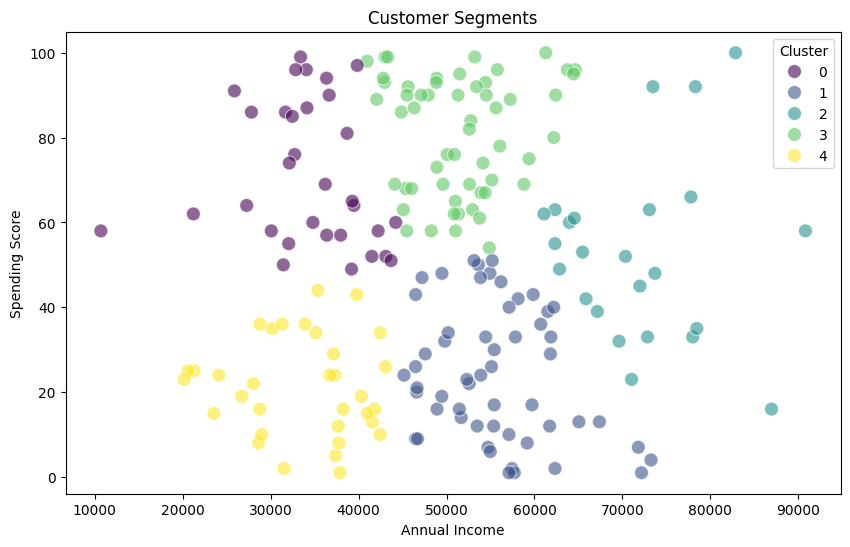

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
n_customers = 200

customer_data = pd.DataFrame({
    'CustomerID': np.arange(1, n_customers + 1),
    'AnnualIncome': np.random.normal(50000, 15000, n_customers).astype(int),
    'SpendingScore': np.random.randint(1, 101, n_customers)
})

print(customer_data.head())

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['AnnualIncome', 'SpendingScore']])

kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_data['AnnualIncome'], y=customer_data['SpendingScore'], hue=customer_data['Cluster'], palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()
